# import all data (there should be some way how to do this within one loop?)

In [104]:
import json
import numpy as np


# dimensions = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
dimensions = [10, 20, 30, 40, 50]


data = {}

for dim in dimensions:

    with open('data' + str(dim) + '.json') as json_file:  
        data[dim] = json.load(json_file)

In [105]:
OrderParameterList = {}


for dim in dimensions:
    
    OrderParameter = np.zeros(dim**2 + 1)
    OrderParameter[0]=0
    
    for occupancy in data[dim]:
        count = int(occupancy)
        average_size = 0
        for size in data[dim][occupancy][1]:
            average_size += size
        average_size = average_size / len(data[dim][occupancy][1])
        OrderParameter[int(occupancy)]=average_size / int(occupancy)
        
    OrderParameterList[dim] = OrderParameter



In [106]:
#print(OrderParameter[0])

In [107]:
from scipy.stats import binom

def BinomialMatrix(N,p):
    BM = [binom.pmf(k,N,p) for k in range(N+1)]
    return BM

def CanonicalOP(p):
    COP=np.zeros(10)
    index = 0
    for dim in dimensions:
        N = np.size(OrderParameterList[dim])
        COP[index]=sum(OrderParameterList[dim]*BinomialMatrix(N-1,p))
        index = index + 1
    return COP

In [108]:
#print(CanonicalOP(.2))

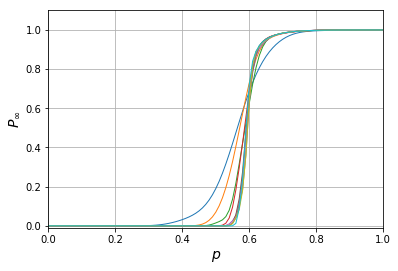

In [109]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

P = [0.01*i for i in range(101)]
OP = np.array([CanonicalOP(p) for p in P]) 

for k in range(10):
    plt.plot(P, OP[:,k],"-", color='C' + str(k), linewidth=1, label=r"0")

plt.grid(True)


plt.xlim(0,1)
plt.ylim(-.01,1.1)
#plt.legend(bbox_to_anchor=(.5, .49), loc=1,frameon=False)
plt.xlabel(r"$p$",fontsize=14)
plt.ylabel(r"$P_{\infty}$",fontsize=14)

plt.show()

In [110]:
matrix_dict = {}
for dim in dimensions:
    matrix_dict[dim] = np.zeros((dim * dim + 1, dim * dim + 1), dtype=float)  
    for occ in data[dim]:
        occupancy = int(occ)
        size_array = np.array(data[dim][occ][0])
        pc_array = np.array(data[dim][occ][1])
        
        #remove percolating clusters from array
        for pc in pc_array:
            indices = np.where(size_array==pc)
            if indices[0].size > 0:
                size_array = np.delete(size_array, indices[0][0])
        array = size_array
        unique, counts = np.unique(array, return_counts=True)        
        ensemble_size = len(data[dim][occ][1])
        tmp_dict = dict(zip(unique, counts / ensemble_size))
        for cluster_size in tmp_dict:
            matrix_dict[dim][occupancy][cluster_size] = tmp_dict[cluster_size] 
            
#notice the structure
# matrix[k,:] gives the distribution of clusters of sizes 1-100 with total occupation k+1,
# here the entry matrix[k,i] is the cluster of size k+1

In [ ]:
MicroSuscept = {}
for dim in dimensions:
    print("calculating data set", dim)
    MicroSuscept[dim] = np.zeros(dim * dim + 1)

    for k in range(dim * dim + 1):
        for i in range(dim * dim + 1):
            MicroSuscept[dim][k] += (i)**2 * matrix_dict[dim][k][i] / np.max([k,1.0]) 

    if dim == 10:
        MicroSuscept[dim]



calculating data set 10
calculating data set 20
calculating data set 30
calculating data set 40
calculating data set 50
calculating data set 60
calculating data set 70
calculating data set 80
calculating data set 90
calculating data set 100


In [98]:
MicroSuscept

{10: array([0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.08000000e+00,
        1.10000000e+00, 1.11200000e+00, 1.16000000e+00, 1.20571429e+00,
        1.26000000e+00, 1.32888889e+00, 1.44000000e+00, 1.47272727e+00,
        1.53333333e+00, 1.62769231e+00, 1.64571429e+00, 1.70400000e+00,
        1.79000000e+00, 1.89882353e+00, 2.16444444e+00, 2.28000000e+00,
        2.40000000e+00, 2.51238095e+00, 2.62181818e+00, 2.74608696e+00,
        3.03000000e+00, 3.22080000e+00, 3.41230769e+00, 3.84444444e+00,
        4.05428571e+00, 4.32413793e+00, 4.66933333e+00, 4.99225806e+00,
        5.91250000e+00, 6.18545455e+00, 6.45176471e+00, 6.98400000e+00,
        7.41111111e+00, 7.86702703e+00, 8.01157895e+00, 9.12000000e+00,
        1.06000000e+01, 1.15570732e+01, 1.08619048e+01, 1.16716279e+01,
        1.22563636e+01, 1.36266667e+01, 1.42139130e+01, 1.56306383e+01,
        1.70491667e+01, 1.94220408e+01, 2.02464000e+01, 2.31152941e+01,
        2.45092308e+01, 2.19607547e+01, 2.48214815e+01, 2.40

In [102]:
from scipy.stats import binom

def BinomialMatrix(N,p):
    BM = [binom.pmf(k,N,p) for k in range(N+1)]
    return BM


def CanonicalSuscept(p):
    CS=np.zeros(10)
    
    index = 0
    for dim in dimensions:
        N = np.size(MicroSuscept[dim])
        CS[index] = sum(MicroSuscept[dim] * BinomialMatrix(N-1,p))
        index += 1
    return CS

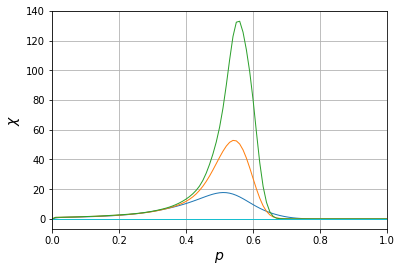

In [103]:
import matplotlib.pyplot as plt
import numpy as np

P = [0.01*i for i in range(101)]
S = np.array([CanonicalSuscept(p) for p in P]) 

for k in range(10):
    plt.plot(P, S[:,k],"-", color='C' + str(k), linewidth=1, label=r"0")

plt.xlim(0,1)
#plt.ylim(0,1.1)


plt.grid(True)


#plt.legend(bbox_to_anchor=(.5, .49), loc=1,frameon=False)
plt.xlabel(r"$p$",fontsize=14)
plt.ylabel(r"$\chi$",fontsize=14)
plt.show()